# What to do
### Start performing high-level data checks such as:

Creating and interpreting high-level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

## First we import libraries, pandas

In [2]:
import pandas as pd
import numpy as np
import os

### We will import the purchase behavior file to clean it

In [31]:
purchase_behaviour_df = pd.read_csv("QVI_purchase_behaviour.csv")

In [36]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,,
1000,1000,YOUNG SINGLES/COUPLES,Premium
1002,1002,YOUNG SINGLES/COUPLES,Mainstream
1003,1003,YOUNG FAMILIES,Budget
1004,1004,OLDER SINGLES/COUPLES,Mainstream
1005,1005,MIDAGE SINGLES/COUPLES,Mainstream


## First problem we come across:
We have two indexes, so we need to set the LYLTY_CARD_NBR column to be the index so that we don't get confusing results.

In [39]:
purchase_behaviour_df = purchase_behaviour_df.set_index("LYLTY_CARD_NBR", drop=True)

## Then again we take a look to see the result

In [40]:
purchase_behaviour_df.head()

,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,
1000,YOUNG SINGLES/COUPLES,Premium
1002,YOUNG SINGLES/COUPLES,Mainstream
1003,YOUNG FAMILIES,Budget
1004,OLDER SINGLES/COUPLES,Mainstream
1005,MIDAGE SINGLES/COUPLES,Mainstream


In [41]:
purchase_behaviour_df.shape

(72637, 2)

In [42]:
purchase_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72637 entries, 1000 to 2373711
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LIFESTAGE         72637 non-null  object
 1   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


## So far we found no missing or inconsistent values.

# Next we import the transaction data file to inspect and clean it

In [44]:
transaction_data_df = pd.read_excel("QVI_transaction_data.xlsx")
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [45]:
transaction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### First we notice that there're no null data

# Secondly the problem we encounter with this dataset is the datatype in the column "DATE"

In [53]:
transaction_data_df["DATE"] = pd.to_datetime(transaction_data_df["DATE"], origin='1899-12-30', unit='D')

ValueError: '0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]' is not compatible with origin='1899-12-30'; it must be numeric with a unit specified

In [49]:
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction_data_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


### Then we will merge the two dataframes on the "LYLTY_CARD_NBR" column

In [54]:
sales_behavior = pd.merge(transaction_data_df, purchase_behaviour_df, on="LYLTY_CARD_NBR")
sales_behavior.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


### Then at last we export the data to a new file to protect the original files from being changed.

In [55]:
sales_behavior.to_csv("sales_behavior.csv")

# There are no more problems with the data, so we move on to the analysis part.

#### First we read the new file

In [66]:
import pandas as pd
import numpy as np
sales_behavior_df = pd.read_csv("sales_behavior.csv", index_col=0)

In [67]:
sales_behavior_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [59]:
# Calculate the Z-scores for the TOT_SALES column
sales_behavior_df['Z_SCORE'] = (sales_behavior_df['TOT_SALES'] - sales_behavior_df['TOT_SALES'].mean()) / sales_behavior_df['TOT_SALES'].std()

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = sales_behavior_df[sales_behavior_df['Z_SCORE'].abs() > threshold]

# Print the outliers
outliers.count()

DATE                439
STORE_NBR           439
LYLTY_CARD_NBR      439
TXN_ID              439
PROD_NBR            439
PROD_NAME           439
PROD_QTY            439
TOT_SALES           439
LIFESTAGE           439
PREMIUM_CUSTOMER    439
Z_SCORE             439
dtype: int64

In [68]:
sales_behavior_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


#### Start the analysis

#### First we need to plot the data to see if there're any visually visible outliers

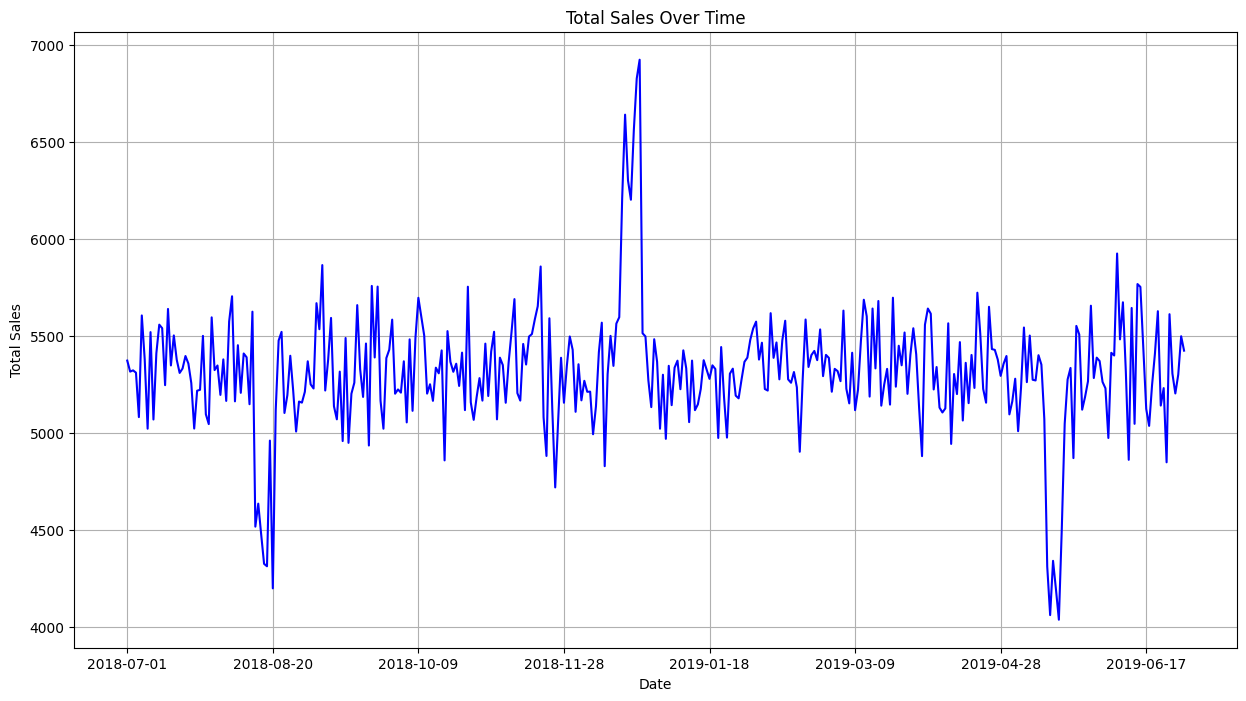

In [ ]:
# Group by DATE and sum the TOT_SALES
sales_by_date = sales_behavior_df.groupby('DATE')['TOT_SALES'].sum()

# Plot the line chart
plt.figure(figsize=(15, 8))
sales_by_date.plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
plt.show()

##### We see here that there're outliers in the data, so we start by isolating them to find out their size in proportion to the actual data

In [ ]:
outliers = sales_by_date[(sales_by_date > 5700) | (sales_by_date < 4700)]

In [76]:
filtered_sales_count = outliers.count()
total_sales_count = sales_behavior_df["TOT_SALES"].count()
percentage_of_outliers = ((filtered_sales_count / total_sales_count)) * 100
print("Percentage of outliers in the total sales: ", percentage_of_outliers)

Percentage of outliers in the total sales:  0.010950172937213974


##### Here we see that the percentage is very low, so we drop the outliers

In [102]:
# Iterate through the outliers and drop them from the sales_behavior_df
# Iterate through the outliers and drop them from the sales_behavior_df
sales_behavior_df = sales_behavior_df[~sales_behavior_df['DATE'].isin(outliers.index)]

# Save the modified dataframe to the original file
sales_behavior_df.to_csv("sales_behavior.csv")


##### Then we run the same graph one more time to see the difference

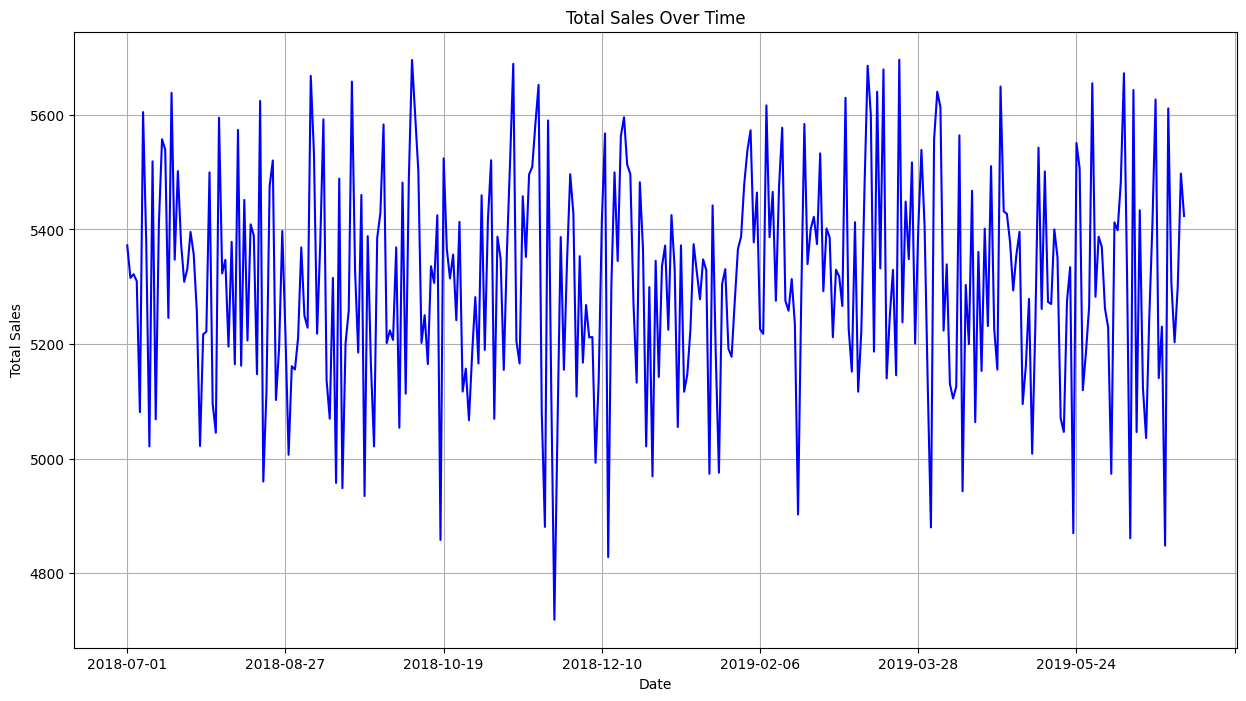

In [84]:
# Group by DATE and sum the TOT_SALES
sales_by_date = sales_behavior_df.groupby('DATE')['TOT_SALES'].sum()

# Plot the line chart
plt.figure(figsize=(15, 8))
sales_by_date.plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
plt.show()

#### Now that we removed all outliers, we continue with the analysis.

In [85]:
relationship = pd.crosstab(sales_behavior_df['LIFESTAGE'], sales_behavior_df['PREMIUM_CUSTOMER'])
print(relationship)

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    4591       10883     7484
NEW FAMILIES              2761        2127     1457
OLDER FAMILIES           21199       13020    10302
OLDER SINGLES/COUPLES    16806       16638    16189
RETIREES                 13891       19547    11959
YOUNG FAMILIES           17522       11847    10555
YOUNG SINGLES/COUPLES     8451       19099     5737


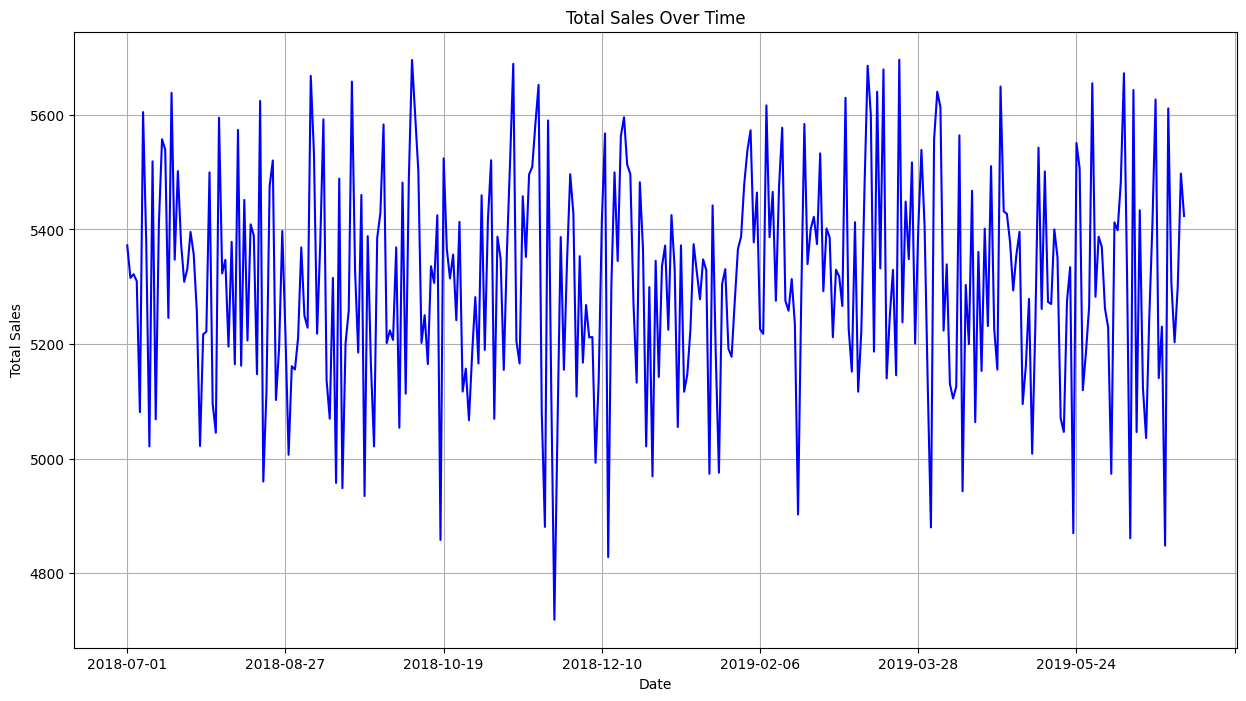

In [100]:
import matplotlib.pyplot as plt

# Plot the line chart for total sales over time
plt.figure(figsize=(15, 8))
sales_by_date.plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
plt.show()

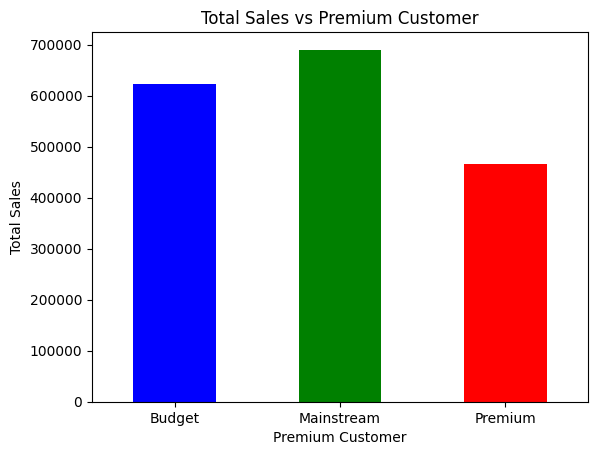

In [86]:
import matplotlib.pyplot as plt

# Group by PREMIUM_CUSTOMER and sum the TOT_SALES
sales_by_customer = sales_behavior_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

# Plot the bar chart with colors and save the plot as an image
colors = ['blue', 'green', 'red']
sales_by_customer.plot(kind='bar', color=colors, rot=0)
plt.xlabel('Premium Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Premium Customer')
plt.savefig('total_sales_vs_premium_customer.png')
plt.show()

### From the previous two figures we see that the highest total sales is coming from
1- the Mainstream and the streams descending are RETIREES, YOUNG SINGLES/COUPLES, OLDER SINGLES/COUPLES<br>
2- Then the Budget with the streams OLDER FAMILIES, YOUNG FAMILIES, OLDER SINGLES/COUPLES<br>
3- Then the Premium with the streams OLDER SINGLES/COUPLES, RETIREES, YOUNG FAMILIES<br>

In [87]:
sales_behavior_df["TOT_SALES"].sum()

np.float64(1778995.5999999999)

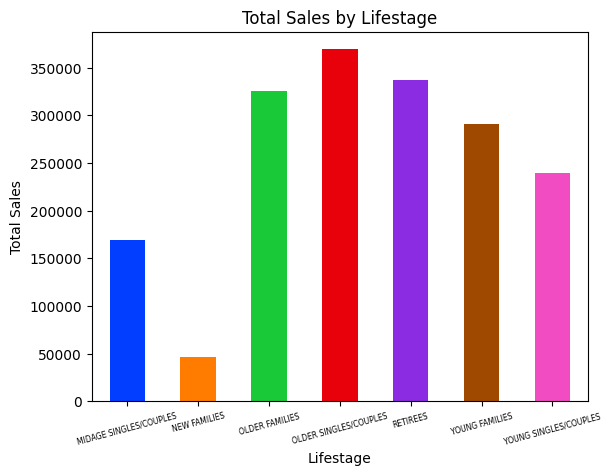

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by LIFESTAGE and sum the TOT_SALES
sales_by_lifestage = sales_behavior_df.groupby('LIFESTAGE')['TOT_SALES'].sum()

# Get a bright color palette with the same number of colors as the number of unique LIFESTAGE categories
unique_lifestages = sales_behavior_df['LIFESTAGE'].unique()
colors = sns.color_palette('bright', len(unique_lifestages))

# Plot the bar chart with distinct bright colors for each LIFESTAGE
sales_by_lifestage.plot(kind='bar', color=colors, rot=45)
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Lifestage')
plt.xticks(rotation=15, fontsize=5.5)
plt.show()


In [20]:
# Group by LIFESTAGE and sum the TOT_SALES
sales_by_lifestage = sales_behavior_df.groupby('LIFESTAGE')['TOT_SALES'].sum()
sales_by_lifestage = sales_by_lifestage.sort_values(ascending=False)
print(sales_by_lifestage)

LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64


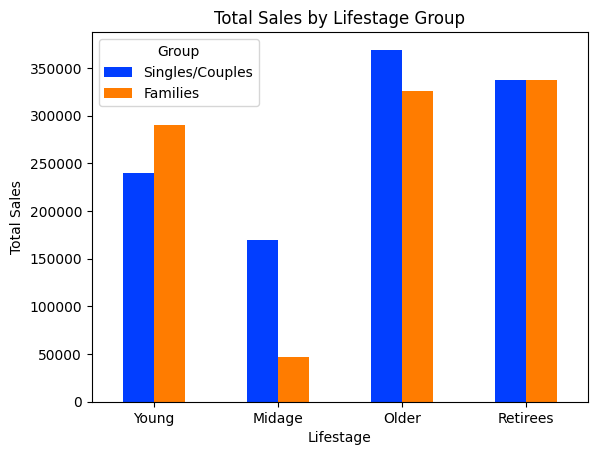

In [90]:
# Combine family groups with the corresponding singles/couples
combined_sales = sales_behavior_df.groupby('LIFESTAGE')['TOT_SALES'].sum()
combined_sales = combined_sales.reindex(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 
                                         'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 
                                         'OLDER SINGLES/COUPLES', 'OLDER FAMILIES', 
                                         'RETIREES'])

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Singles/Couples': combined_sales[['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'OLDER SINGLES/COUPLES', 'RETIREES']].values,
    'Families': combined_sales[['YOUNG FAMILIES', 'NEW FAMILIES', 'OLDER FAMILIES', 'RETIREES']].values
}, index=['Young', 'Midage', 'Older', 'Retirees'])

# Plot the clustered column chart
plot_data.plot(kind='bar', color=colors[:2], rot=0)
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Lifestage Group')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.show()

In [93]:
num_products = sales_behavior_df['PROD_NAME'].nunique()
print("Number of different products:", num_products)

Number of different products: 114


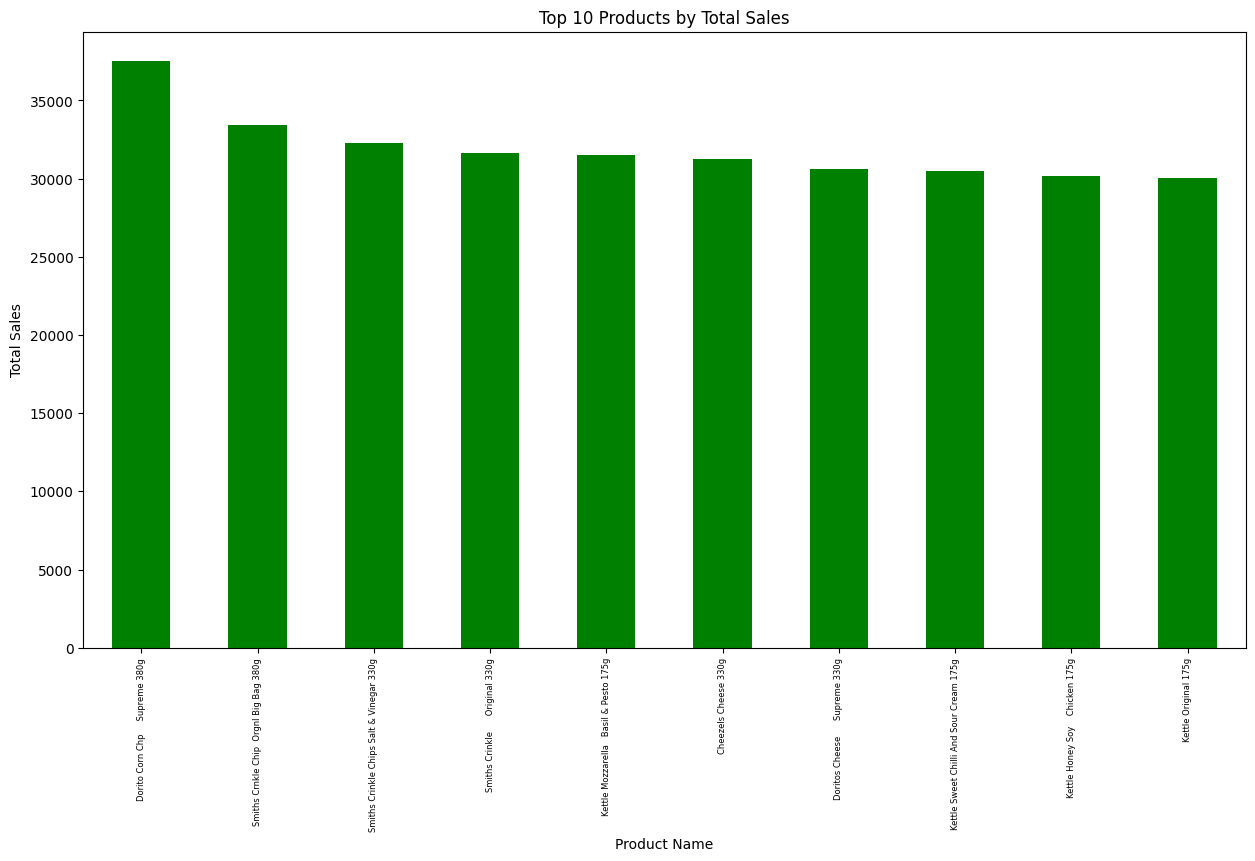

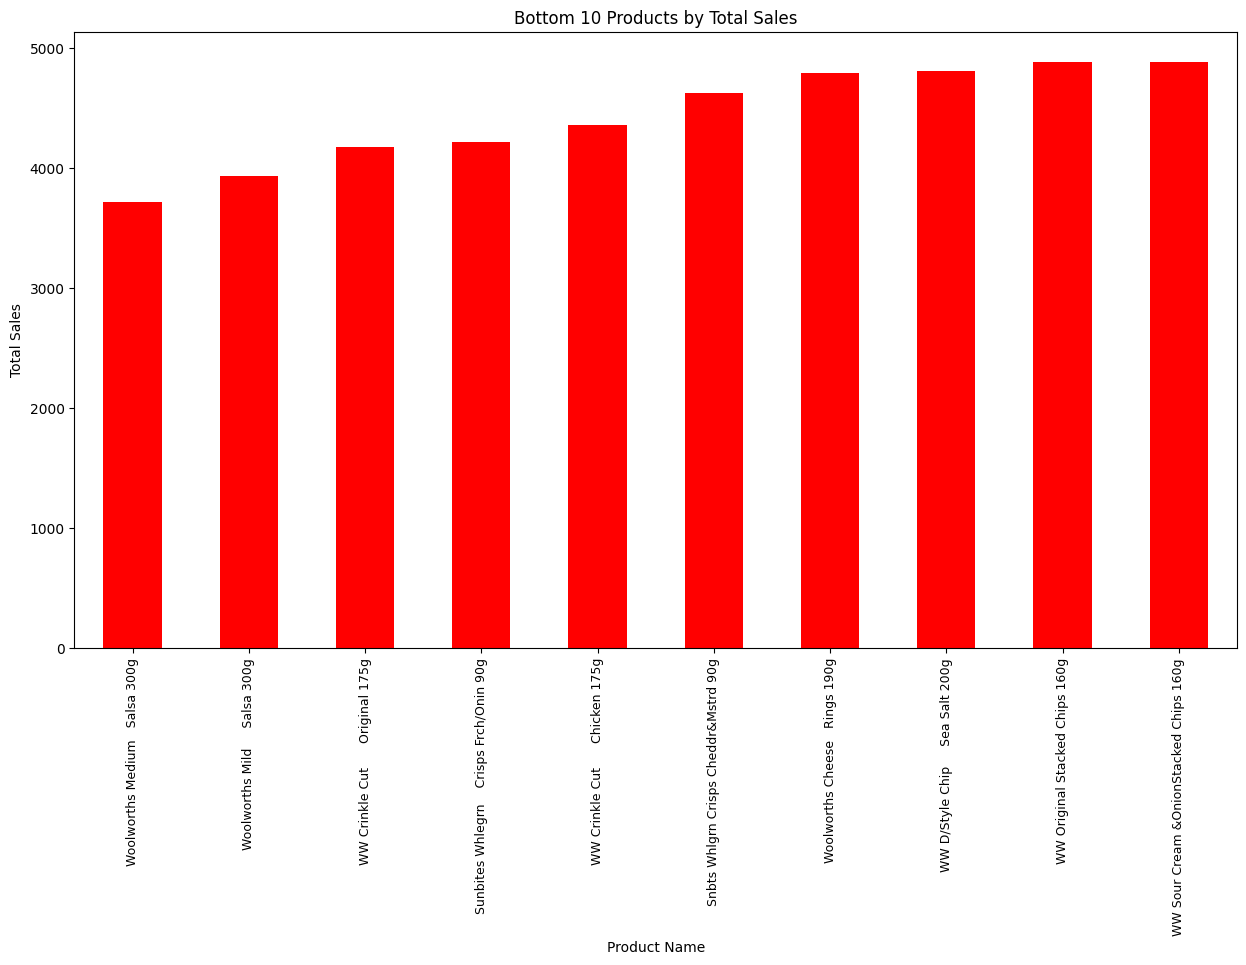

In [97]:
import matplotlib.pyplot as plt

# Group by PROD_NAME and sum the TOT_SALES
sales_by_product = sales_behavior_df.groupby('PROD_NAME')['TOT_SALES'].sum()

# Sort the sales by product in descending order and select the top 10 and bottom 10
top_10_sales_by_product = sales_by_product.sort_values(ascending=False).head(10)
bottom_10_sales_by_product = sales_by_product.sort_values(ascending=True).head(10)

# Plot the bar chart for top 10 products
plt.figure(figsize=(15, 8))
top_10_sales_by_product.plot(kind='bar', color='green')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Total Sales')
plt.xticks(rotation=90, fontsize=6)
plt.show()

# Plot the bar chart for bottom 10 products
plt.figure(figsize=(15, 8))
bottom_10_sales_by_product.plot(kind='bar', color='red')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Bottom 10 Products by Total Sales')
plt.xticks(rotation=90, fontsize=9)
plt.show()

In [98]:
lylty_card_count = sales_behavior_df.groupby('LYLTY_CARD_NBR').size()
print("Number of different LYLTY_CARD_NBR:", lylty_card_count.count())

Number of different LYLTY_CARD_NBR: 70942


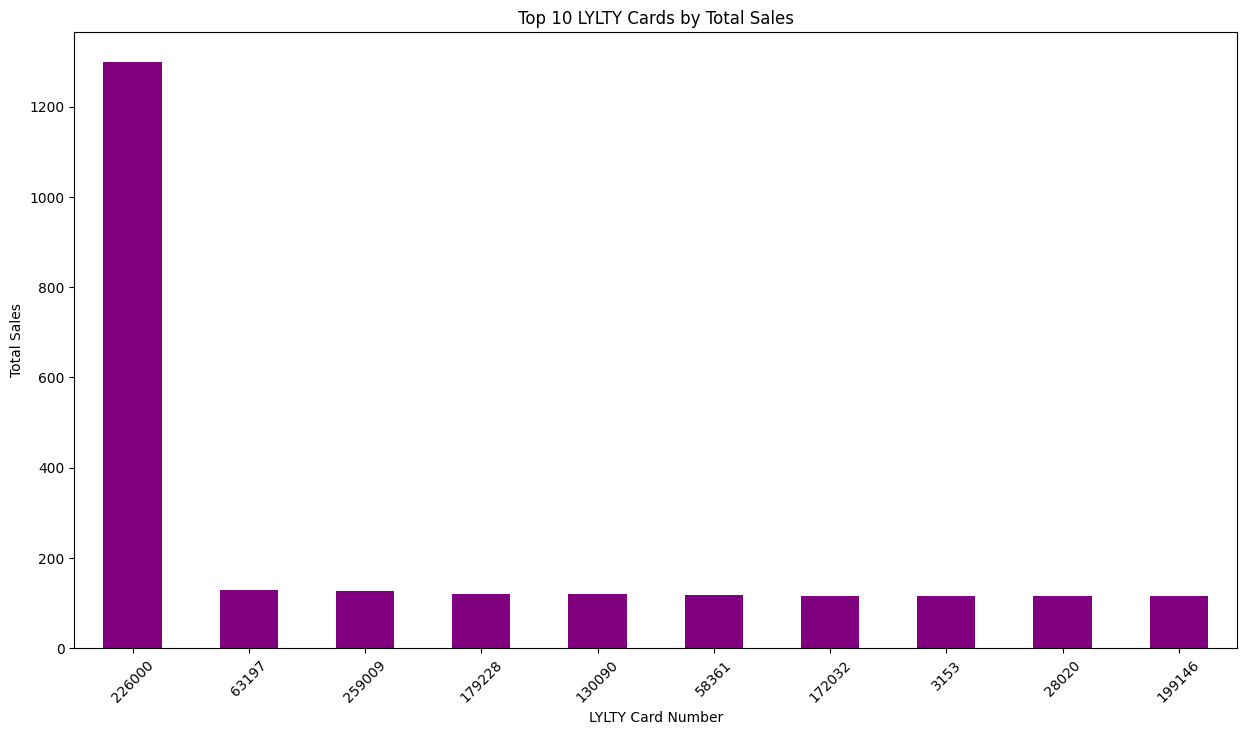

In [99]:
# Group by LYLTY_CARD_NBR and sum the TOT_SALES
sales_by_card = sales_behavior_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()

# Sort the sales by card in descending order and select the top 10
top_10_sales_by_card = sales_by_card.sort_values(ascending=False).head(10)

# Plot the bar chart for top 10 LYLTY cards
plt.figure(figsize=(15, 8))
top_10_sales_by_card.plot(kind='bar', color='purple')
plt.xlabel('LYLTY Card Number')
plt.ylabel('Total Sales')
plt.title('Top 10 LYLTY Cards by Total Sales')
plt.xticks(rotation=45)
plt.show()

##### We can see here that there's one loyalty card that is driving a very large amount of sales that's worth looking into.